In [32]:
import numpy as np
from databroker import catalog
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
db = catalog['heavy']

In [6]:
uid = '08dfc693-e3aa-4fd2-b3cf-2e282298200c'

In [7]:
run = db[uid]

In [10]:
data = run.primary.read()

In [11]:
data

<xarray.Dataset>
Dimensions:                            (time: 30, dim_0: 109, dim_1: 109)
Coordinates:
  * time                               (time) float64 1.686e+09 ... 1.686e+09
Dimensions without coordinates: dim_0, dim_1
Data variables:
    mux_power_converter_readback       (time) float64 0.0 0.0 0.0 ... 0.0 0.0
    mux_power_converter_setpoint       (time) float64 0.0 0.0 0.0 ... 0.0 0.0
    mux_selected_multiplexer_readback  (time) <U7 'q1m1d1r' ... 'q1m1d2r'
    mux_selected_multiplexer_setpoint  (time) <U7 'q1m1d1r' ... 'q1m1d2r'
    cs_setpoint                        (time) int64 0 1 2 0 1 2 ... 0 1 2 0 1 2
    bpm_count                          (time) float64 688.0 689.0 ... 983.0
    bpm_ds                             (time, dim_0) float64 3.995 ... 237.3
    bpm_elem_data                      (time, dim_1) object {'gain_raw': 0.0,...

In [14]:
one_reading = data.bpm_elem_data.isel(time=0)

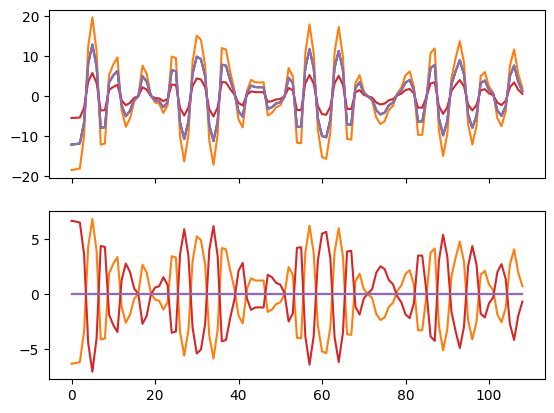

In [34]:
def extract(item):
    return item["x"]["pos_raw"] * 1e6

converted = np.array(
    [[extract(item) for item in one_reading] for one_reading in data.bpm_elem_data.values[:15:3]]
)
ref = converted[0]
fig, axes = plt.subplots(2, 1, sharex=True)
ax, ax_diff = axes
for event in converted:
    ax.plot(event)
    ax_diff.plot(event - ref)

